<a href="https://colab.research.google.com/github/Harsh-Sagar/Machine-learning/blob/main/Defense-System-Enemy-Signal-Prediction(Kernel%20regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Problem Statement:***

Develop a predictive model using Kernel regression to analyze and predict enemy signal patterns for a defense system. The model should be capable of accurately identifying and generalizing enemy information based on intercepted signals. The goal is to optimize the hyperparameters, alpha and gamma, to achieve a high level of predictive accuracy, with an R² score of approximately 0.90 on the test data. This will enable the defense system to anticipate enemy movements or strategies based on signal patterns.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/sachinmotwani20/NPTEL-ML_Datasets/main/InterceptedSignal.csv')
data.head()

,time-stamp,value
0,-1.000000,0.000000
1,0.681818,0.630206
2,1.363636,0.978619
3,2.045455,0.889449
4,2.727273,0.402567


In [ ]:
data.shape

(45, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time-stamp  45 non-null     float64
 1   value       44 non-null     float64
dtypes: float64(2)
memory usage: 848.0 bytes


In [ ]:
#Finding the null value index
data[data['value'].isnull()].index

Index([25], dtype='int64')

NULL value is present at 25th index of the 'value' column.

In [ ]:
#view the 25th row of the dataset
data.iloc[25]

,25
time-stamp,17.045455
value,NaN


In [ ]:
#Drop the row which has NULL value 25th row
df =data.drop([25]).reset_index()
df=df.drop(['index'],axis=1)
df

,time-stamp,value
0,-1.000000,0.000000
1,0.681818,0.630206
2,1.363636,0.978619
3,2.045455,0.889449
4,2.727273,0.402567
5,3.409091,-0.264319
6,4.090909,-0.813018
7,4.772727,-200.000000
8,5.454545,-0.737013
9,6.136364,-0.146295


In [ ]:
# Time can't be -ve.
df.iloc[0][0]=0
df

<ipython-input-45-079550aa5ec7>:2: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  df.iloc[0][0]=0


,time-stamp,value
0,0.000000,0.000000
1,0.681818,0.630206
2,1.363636,0.978619
3,2.045455,0.889449
4,2.727273,0.402567
5,3.409091,-0.264319
6,4.090909,-0.813018
7,4.772727,-200.000000
8,5.454545,-0.737013
9,6.136364,-0.146295


Separate the features (independent variable) and the target variable(dependent variable).

In [ ]:
features =df.iloc[:,:-1]
predictions=df.iloc[:,-1]

In [ ]:
features.head()

,time-stamp
0,0.000000
1,0.681818
2,1.363636
3,2.045455
4,2.727273


In [ ]:
predictions.head()

,value
0,0.000000
1,0.630206
2,0.978619
3,0.889449
4,0.402567


Training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, predictions, test_size=0.2, random_state=42,shuffle=True)


Perform Exploratory Data Analysis(EDA)

In [ ]:
Train_data=pd.concat([X_train,y_train],axis='columns')
Train_data.head()

,time-stamp,value
3,2.045455,0.889449
6,4.090909,-0.813018
27,19.090909,0.239017
31,21.818182,0.172106
19,12.954545,0.378500


In [ ]:
Train_data.describe()

,time-stamp,value
count,35.000000,35.000000
mean,14.415584,-5.616773
std,8.984891,33.830094
min,0.000000,-200.000000
25%,7.159091,-0.520639
50%,13.636364,0.026142
75%,21.477273,0.775974
max,30.000000,0.999415


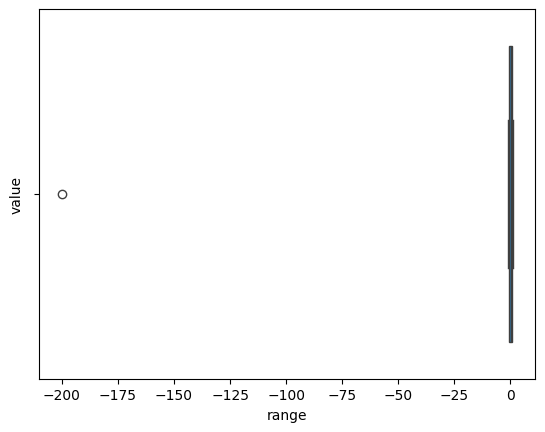

In [ ]:
import seaborn as sns
sns.boxplot(data=y_train,orient='h').set(xlabel='range',ylabel='value')
plt.show()

In [ ]:
#Removing outlier
q1=np.quantile(y_train.to_numpy(),0.25) #finding the 1st quartile
q3=np.quantile(y_train.to_numpy(),0.75) #finding the 3st quartile
median=np.median(y_train.to_numpy())

#find the iqr region
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)

#Calculate outliers
outlires =y_train.to_numpy()[(y_train.to_numpy()<= lower_bound) | (y_train.to_numpy()>=upper_bound)]
print('The outliers in y_train are: ',outlires)

The outliers in y_train are:  [-200.]


Only one outlier point

In [ ]:
#Dropping the row of outlier
Train_data.loc[Train_data['value']==-200]

,time-stamp,value
7,4.772727,-200.0


In [ ]:
#Drop the row with index 7 and update the X_train and Y_train
Train_data=Train_data.drop([7]).reset_index()
Train_data.drop(['index'],axis=1,inplace=True)
X_train=pd.DataFrame(Train_data['time-stamp'])
y_train=pd.DataFrame(Train_data['value'])

Again plot boxplot and view changes

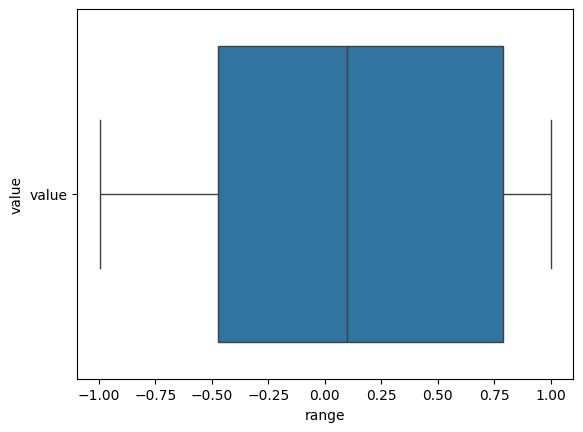

In [ ]:
sns.boxplot(data=y_train,orient='h').set(xlabel='range',ylabel='value')
plt.show()

Correlation Analysis

In [ ]:
#Perform Correlation analysis b/w numerical features
corr_mat=Train_data.corr(method='pearson')
corr_mat

,time-stamp,value
time-stamp,1.000000,-0.180103
value,-0.180103,1.000000


There seems no correlation b/w the time-stamp and the value

***Visulizations***

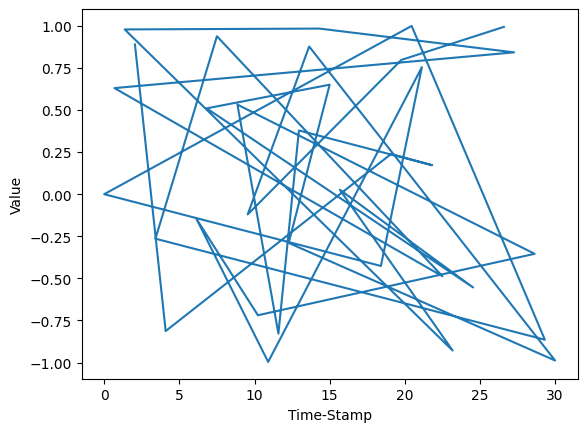

In [ ]:
plt.plot(X_train,y_train)
plt.xlabel('Time-Stamp')
plt.ylabel('Value')
plt.show()

This is time based data it should be in sorted order of increasing time

In [ ]:
#Sort
Sorted_data=Train_data
Sorted_data.sort_values('time-stamp',inplace=True)
Sorted_data.head()

,time-stamp,value
13,0.000000,0.000000
19,0.681818,0.630206
22,1.363636,0.978619
0,2.045455,0.889449
16,3.409091,-0.264319


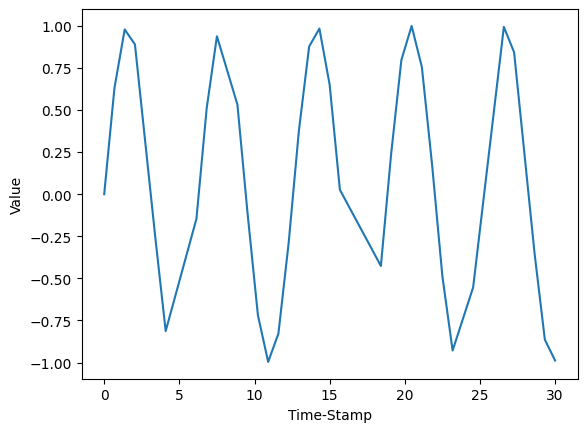

In [ ]:
#Visualize
plt.plot(Sorted_data['time-stamp'],Sorted_data['value'])
plt.xlabel('Time-Stamp')
plt.ylabel('Value')
plt.show()

This seems similar to a sine wave

***MODEL BUILDING: TRAINING AND TESTING***

***Using RIDGE REGRESSION(RR) model***

In [ ]:
from sklearn.linear_model import Ridge
model=  Ridge(alpha=1.0)

model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred=model.predict(X_test)

In [ ]:
# Evaluate the model using commonly used metrics
from sklearn.metrics import r2_score
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred)

print('R2 score for training data: ',r2_train)
print('R2 score for testing data: ',r2_test)

R2 score for training data:  0.03243711772671665
R2 score for testing data:  -0.06908327788031143


Ridge Model give a very bad result. The model has not trained at all

***Now using KERNEL RIDGE REGRESSION(KRR) model***

In [ ]:
from sklearn.kernel_ridge import KernelRidge
model=  KernelRidge(kernel="rbf")

model.fit(X_train,y_train)
y_pred_train=model.predict(X_train)
y_pred=model.predict(X_test)

**Result and Interpretation**

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mse_train = mean_squared_error(y_train,y_pred_train)
mae_train = mean_absolute_error(y_train,y_pred_train)
r2_train=r2_score(y_train,y_pred_train)

print("Evaluation metrics : Train Data")
print('MSE for training data: ',mse_train)
print('MAE for testing data: ',mae_train)
print('R2 score for training data: ',r2_train)

Evaluation metrics : Train Data
MSE for training data:  0.06803844640255145
MAE for testing data:  0.23492574667793442
R2 score for training data:  0.8554256898556578


In [ ]:
#for test data
mse_test=mean_squared_error(y_test,y_pred)
mae_test=mean_absolute_error(y_test,y_pred)
r2_test=r2_score(y_test,y_pred)



print("Evaluation metrics : Test Data")
print('MSE for testing data: ',mse_test)
print('MAE for testing data: ',mae_test)
print('R2 score for testing data: ',r2_test)

Evaluation metrics : Test Data
MSE for testing data:  0.2361742814238229
MAE for testing data:  0.44458276214879455
R2 score for testing data:  0.497996788505944


*Lets try to more improve it through hyperparameter tuning.*

***Hyperparameter Tuning: Grid Search***
Two immportant hyperparameter
1. Alpha(Strength of regularization)
2. Gamma (Smoothning Parameter)

In [ ]:
from math import gamma
#Hyperparameter tuning
alpha_values=[0.1,1,10,100]
gamma_values=[0.01,0.1,1,10]
model_best =KernelRidge(kernel="rbf")

#tune the hyperparameters using R2 score on testing set
alpha_best=None
gamma_best=None
best_r2=-np.inf
for alpha in alpha_values:
  for gamma in gamma_values:
    model_best.set_params(alpha=alpha,gamma=gamma)
    model_best.fit(X_train,y_train)
    y_pred=model_best.predict(X_test)
    r2=r2_score(y_test,y_pred)
    if r2>best_r2:
      best_r2=r2
      alpha_best=alpha
      gamma_best=gamma

#fit the KRR with best hyperparameters and evaluate it
model_best.set_params(alpha=alpha_best,gamma=gamma_best)
model_best.fit(X_train,y_train)
y_train_pred_best=model_best.predict(X_train)
y_test_pred_best=model_best.predict(X_test)
r2_train_best=r2_score(y_train,y_train_pred_best)
r2_test_best=r2_score(y_test,y_test_pred_best)

print("Evaluation metrics : Grid Search")
print('Best alpha: ',alpha_best)
print('Best gamma: ',gamma_best)
print('R2 score for training data: ',r2_train_best)
print('R2 score for testing data: ',r2_test_best)

Evaluation metrics : Grid Search
Best alpha:  0.1
Best gamma:  0.1
R2 score for training data:  0.9603579700278589
R2 score for testing data:  0.9064481706647295


The hyperparameter tuning has significantly improved the model performance.

This also reflects the downside of this method that it is severly affected by the choices of the hyperparameters.

***Polynomial Kernel Regression(Example)***

In [ ]:
from sklearn.pipeline import Pipeline
#PolynomialFeatues generate new set of polynomial and interaction features using the existing features
#E.g. for 2D input[a,b] and 2nd degree ploynomial are [1,a,b,a^2,b^2,ab]
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
#Generate Random Data for Polynomial Regression
np.random.seed(0)
n_samples=45
X=np.sort(np.random.rand(n_samples))
y=np.sin(1.5*np.pi*X)+np.random.randn(n_samples)*0.2

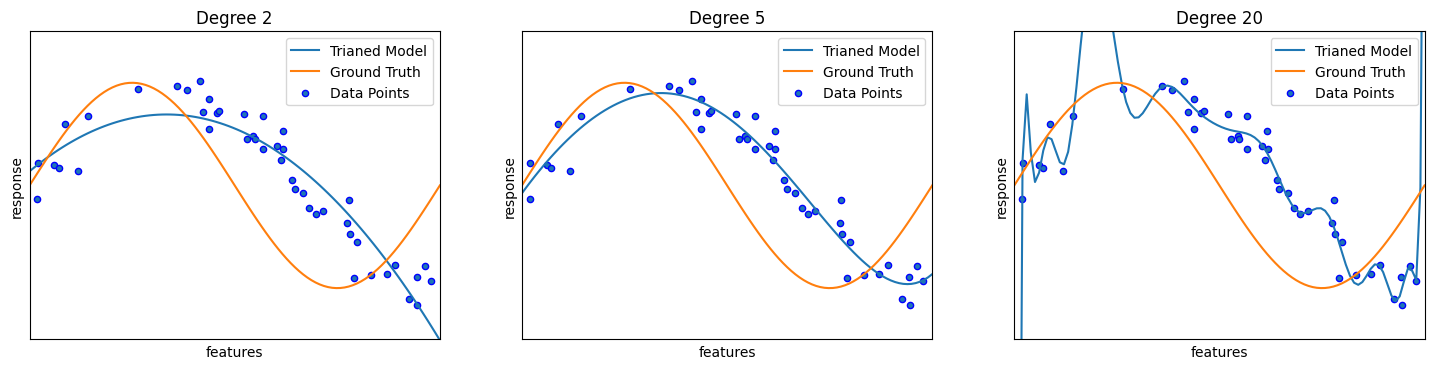

In [ ]:
degrees=[2,5,20]
plt.figure(figsize=(18,4))
for i,degree in enumerate(degrees):
  ax=plt.subplot(1,len(degrees),i+1)
  plt.setp(ax,xticks=(),yticks=())
  polynomial_features=PolynomialFeatures(degree=degree,include_bias=False)
  linear_regression=LinearRegression()
  pipeline=Pipeline([("polynomial_features",polynomial_features),
                   ("linear_regression",linear_regression)])
  pipeline.fit(X.reshape(-1,1),y)


  X_test=np.linspace(0,1,100)
  plt.plot(X_test,pipeline.predict(X_test[:,np.newaxis]),label="Trianed Model")
  plt.plot(X_test,np.sin(2*np.pi*X_test),label="Ground Truth")
  plt.scatter(X,y,edgecolor='b',s=20,label="Data Points")
  plt.xlabel("features")
  plt.ylabel("response")
  plt.xlim((0,1))
  plt.ylim((-1.5,1.5))
  plt.legend(loc="best")
  plt.title(f"Degree {degree}")
plt.show()

Degree 2 : Underfitting,  
Degree 5 : Optimal fit,  
Degree 20 : Over fitting

***Conclusion***

We have built a Kernel regression model that learns the pattern of the enemy signal a train R2 score of approx. 0.96 and a test R2 score of 0.90.

The best value of the both the hyperparameters, alpha and gamma, turns out to be 0.1.